```{contents}
```

## Hyperparameter Tuning

Random Forest has **several hyperparameters** that control the **growth of trees, diversity, and ensemble behavior**. Tuning these is essential to get the **best performance**.

### **Key Hyperparameters**

| Hyperparameter      | Description                                                      | Effect / Tuning Tip                                                                                                         |
| ------------------- | ---------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------- |
| `n_estimators`      | Number of trees in the forest                                    | More trees → better performance, lower variance, but slower training. Usually 100–500 is sufficient.                        |
| `max_depth`         | Maximum depth of each tree                                       | Controls overfitting. Higher depth → complex tree → risk of overfitting. Lower depth → simpler tree → risk of underfitting. |
| `min_samples_split` | Minimum samples to split a node                                  | Higher value → simpler tree → reduces overfitting. Lower value → deeper splits → more variance.                             |
| `min_samples_leaf`  | Minimum samples at a leaf                                        | Larger leaf → smoother predictions → reduces overfitting.                                                                   |
| `max_features`      | Number of features considered at each split                      | Lower → more diversity → less correlation among trees → reduces overfitting. Higher → lower bias but more correlated trees. |
| `bootstrap`         | Whether to use bootstrap sampling                                | Usually True (bagging). False → entire dataset per tree → can overfit.                                                      |
| `criterion`         | Split quality measure (`gini`, `entropy`, `squared_error`, etc.) | Affects node splits; usually small impact.                                                                                  |

---

### **Hyperparameter Tuning Workflow**

1. **Define Parameter Grid:**

   ```python
   param_grid = {
       'n_estimators': [100, 200, 300],
       'max_depth': [None, 5, 10, 15],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf': [1, 2, 4],
       'max_features': ['sqrt', 'log2', None]
   }
   ```

2. **Use GridSearchCV or RandomizedSearchCV**:

   * Perform cross-validation to find the combination that **maximizes performance** on validation sets.

3. **Evaluate Best Model**:

   * Compare **train/test R², RMSE** (regression) or **accuracy, F1-score** (classification).

4. **Adjust if Needed**:

   * If overfitting persists, increase `min_samples_leaf` or reduce `max_depth`.
   * If underfitting, allow deeper trees or reduce `min_samples_leaf`.

---

## **2. Handling Overfitting in Random Forest**

**Overfitting occurs** when the model performs well on training data but poorly on test data. Even though Random Forest reduces overfitting compared to a single tree, it can still overfit if trees are too deep or correlated.

### **Strategies to Reduce Overfitting**

1. **Limit Tree Depth:**

   * `max_depth` → restricts the complexity of each tree.

2. **Increase Minimum Samples per Leaf / Split:**

   * `min_samples_leaf` and `min_samples_split` → prevent trees from fitting noise.

3. **Reduce Maximum Features (`max_features`):**

   * More randomness → less correlation among trees → better generalization.

4. **Increase Number of Trees (`n_estimators`):**

   * Averaging predictions over more trees reduces variance.

5. **Use Bootstrapping:**

   * Ensures each tree sees a different dataset → reduces overfitting.

---

## **3. Handling Underfitting in Random Forest**

**Underfitting occurs** when the model is too simple and fails to capture patterns in the data.

### **Strategies to Reduce Underfitting**

1. **Increase Tree Depth (`max_depth`)**:

   * Allow trees to grow deeper → can capture complex patterns.

2. **Reduce Minimum Samples per Leaf / Split:**

   * Smaller leaves → trees can split more → capture more detail.

3. **Increase Maximum Features (`max_features`)**:

   * Consider more features at each split → less bias.

4. **Increase Number of Trees (`n_estimators`)**:

   * More trees → better aggregation → better capture of patterns.

---

## **4. Practical Tips**

* Random Forest is **robust**, but tuning hyperparameters can **significantly improve performance**.

* Use **cross-validation** to avoid overfitting while tuning.

* Monitor **train vs test performance**:

  * Large gap → overfitting
  * Both low → underfitting

* Consider **feature importance**: remove irrelevant features to reduce noise and improve generalization.

---

### **5. Visual Intuition**

* **Underfitting:** Trees are too shallow, predictions are too flat.
* **Overfitting:** Trees memorize training data, predictions fluctuate on test data.
* **Properly Tuned:** Trees are deep enough to capture patterns, but averaging predictions smooths noise → balanced bias and variance.



Underfitting RF Performance:
Train R²: 0.63
Test R²: 0.62


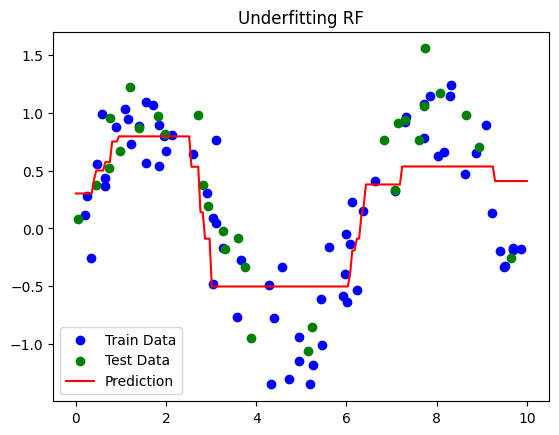


Overfitting RF Performance:
Train R²: 0.96
Test R²: 0.79


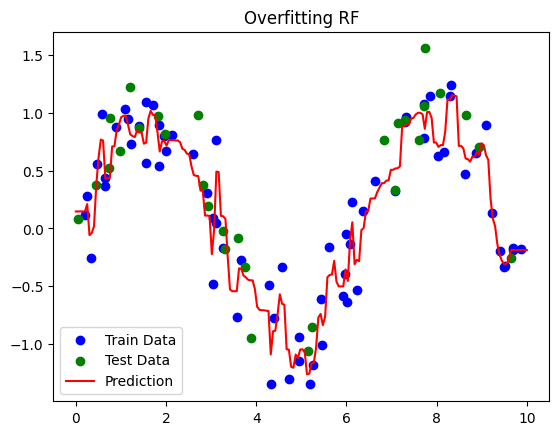


Properly Tuned RF Performance:
Train R²: 0.90
Test R²: 0.85


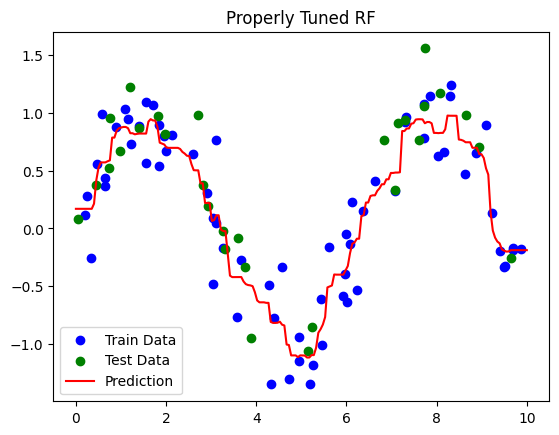

In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Step 2: Create Sample Dataset
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.3, X.shape[0])

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train and evaluate a model
def evaluate_rf(model, X_train, X_test, y_train, y_test, label="Model"):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f"\n{label} Performance:")
    print(f"Train R²: {r2_score(y_train, y_train_pred):.2f}")
    print(f"Test R²: {r2_score(y_test, y_test_pred):.2f}")
    
    # Plot
    plt.scatter(X_train, y_train, c='blue', label='Train Data')
    plt.scatter(X_test, y_test, c='green', label='Test Data')
    X_plot = np.linspace(0, 10, 200).reshape(-1,1)
    plt.plot(X_plot, model.predict(X_plot), c='red', label='Prediction')
    plt.title(label)
    plt.legend()
    plt.show()

# ----------------------
# Underfitting Example
# ----------------------
rf_underfit = RandomForestRegressor(n_estimators=10, max_depth=2, random_state=42)
evaluate_rf(rf_underfit, X_train, X_test, y_train, y_test, label="Underfitting RF")

# ----------------------
# Overfitting Example
# ----------------------
rf_overfit = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_leaf=1, random_state=42)
evaluate_rf(rf_overfit, X_train, X_test, y_train, y_test, label="Overfitting RF")

# ----------------------
# Properly Tuned RF using GridSearchCV
# ----------------------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
evaluate_rf(best_rf, X_train, X_test, y_train, y_test, label="Properly Tuned RF")


### **Interpretation**

1. **Dataset:** $y = \sin(X) + \text{noise}$ → nonlinear regression pattern.

2. **Underfitting RF:**

   * Very shallow trees (`max_depth=2`) and few trees (`n_estimators=10`) → fails to capture sine pattern.
   * Both train and test R² are low.

3. **Overfitting RF:**

   * Deep trees (`max_depth=None`) and many trees → memorizes training data.
   * High train R², test R² may be lower due to noise.

4. **Properly Tuned RF:**

   * GridSearchCV finds **optimal depth, number of trees, and leaf size**.
   * Balanced model → captures pattern without overfitting.

---

**Key Takeaways**

* **Underfitting:** Increase tree depth, reduce `min_samples_leaf`, increase `max_features`.
* **Overfitting:** Limit tree depth, increase `min_samples_leaf`, reduce `max_features`.
* **Hyperparameter tuning** is essential to **balance bias and variance** in Random Forest.

